In [1]:
from itertools import combinations

import numpy as np
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
from matplotlib import collections as mc
from matplotlib.patches import Circle
import seaborn as sns

%matplotlib inline

import sys
sys.path.append('/Users/kje/Checkout/Dionysus/build/bindings/python/')

from ph import compute_persistence_rips, get_birth_and_deaths

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [237]:
def plot_barcode(bars, figsize=(12,8)):

    nrows = 2
        
    fig, ax = plt.subplots(nrows=nrows, ncols=1, sharex=True, figsize=figsize)
    fig.subplots_adjust(hspace=0.05)

    for i in range(2):
        if i == 0:
            s1 = sorted(bars[i], key=lambda tup: tup[1])[::-1]
        if i == 1:
            s1 = sorted(bars[i], key=lambda tup: tup[0])[::-1]
        for bidx, b in enumerate(s1):
            try:
                ax[i].plot([b[0], b[1]], [bidx+1, bidx+1], c='b', lw=1.0)
            except:
                pass
            
        ax[i].set_yticklabels('')
        ax[i].set_ylim((0, len(s1)+1))
        
    ax[0].set_ylabel('H0', rotation=0, va='center', fontsize=12)
    ax[1].set_ylabel('H1', rotation=0, va='center', fontsize=12)
    
    ax[1].axis('on')
    ax[1].set_xlabel('Distance')
    
    sns.despine()
    plt.close()
    return fig


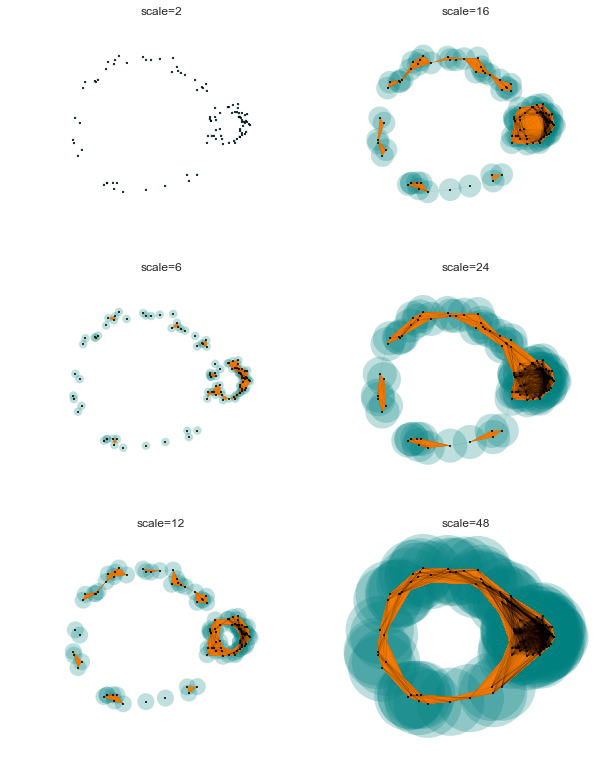

In [2]:
r1 = 96
eps1 = 5
theta1 = np.random.uniform(0, 2*np.pi, 50)

r2 = 24
eps2 = 5
theta2 = np.random.uniform(0, 2*np.pi, 50)

x1 = r1*np.cos(theta1)+eps1*np.random.randn(theta1.shape[0])
y1 = r1*np.sin(theta1)+eps1*np.random.randn(theta1.shape[0])

x2 = r1 + r2 + r2*np.cos(theta2)+eps2*np.random.randn(theta2.shape[0])
y2 = r2*np.sin(theta2)+eps2*np.random.randn(theta2.shape[0])

x = np.hstack([x1,x2])
y = np.hstack([y1,y2])

n = x.shape[0]
# distance matrix
d = squareform(pdist(np.array((x,y)).T))

fig, ax = plt.subplots(3, 2, figsize=(10, 13))
sizes = [2, 6, 12, 16, 24, 48]

for p in range(6):
    px = p % 3
    py = p / 3

    ax[px,py].set_aspect('equal')
    
    # add 0-simplices
    for xx, yy in zip(x, y):
        ax[px,py].add_artist(Circle(xy=(xx, yy), radius=sizes[p], linewidth=0, color=(0, .5, .5), alpha=0.25, zorder=-10))
    ax[px, py].scatter(x,y, c='k', linewidths=0, alpha=1, s=4)
    
    # add 1-simplices
    lines = []
    for i,j in combinations(range(n), 2):
        if (d[i,j] < 2*sizes[p]):
            lines.append([(x[i],y[i]),(x[j],y[j])])
    
    lc = mc.LineCollection(lines, color='k', linewidths=.1, alpha=0.5, zorder=-1)
    ax[px,py].add_collection(lc)
   
    # add 2-simplices
    triangles = []
    for i,j,k in combinations(range(n), 3):
        if (d[i,j]<2*sizes[p]) and (d[i,k]<2*sizes[p]) and (d[j,k]<2*sizes[p]):
            triangles.append([(x[i],y[i]),(x[j],y[j]),(x[k],y[k])])
    tc = mc.PolyCollection(triangles, facecolors=(.95, .48, 0), alpha=1, linewidths=0, zorder=-5)
    ax[px,py].add_collection(tc)
    
    # finalize subfigure
    ax[px,py].axis('off')
    ax[px,py].set_title('scale={0}'.format(sizes[p]))
    
# plt.tight_layout()
# plt.savefig('./expanding_balls.pdf', format='pdf')

In [224]:
bars = compute_persistence_rips(d/2, verbose = False)

In [241]:
sns.set_style('white')
fig = plot_barcode(bars)
fig.tight_layout()
fig.savefig('./expanding_balls_barcode.pdf', format='pdf')

In [5]:
np.savetxt('./expanding_balls.csv', d, delimiter=',')